In [3]:
# Importing the packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
# Importing the dasaet
df = pd.read_csv("insurance.csv")

Categorical Features :
- Sex
- Smoker
- Region

Values Features :
- Age
- Children
- Charges

In [5]:
# Overview of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# Shape of the dataset
df.shape

(1338, 7)

In [7]:
# Getting some informations about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# Cheking for the missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# Statistical measures of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Visualisation of Values Features :
- Age
- Children
- Charges

<Figure size 600x600 with 0 Axes>

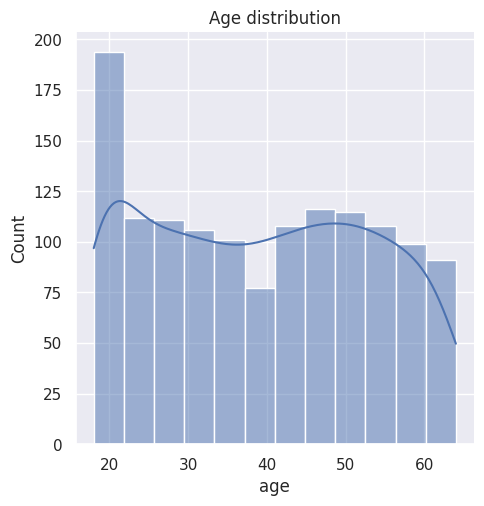

In [10]:
# Distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['age'], kde=True)
plt.title('Age distribution')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 600x600 with 0 Axes>

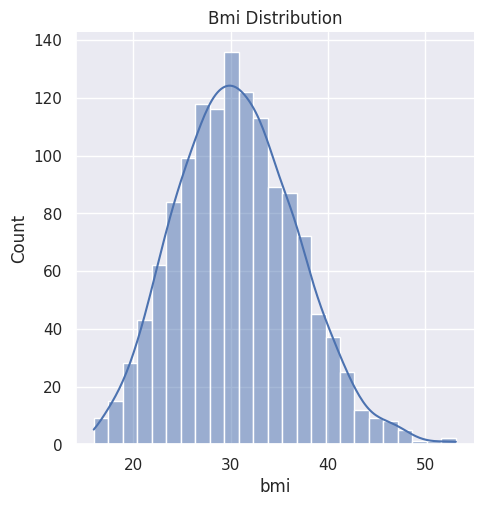

In [11]:
# Distribution of bmi
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['bmi'],kde=True)
plt.title('Bmi Distribution')
plt.show

<Figure size 600x600 with 0 Axes>

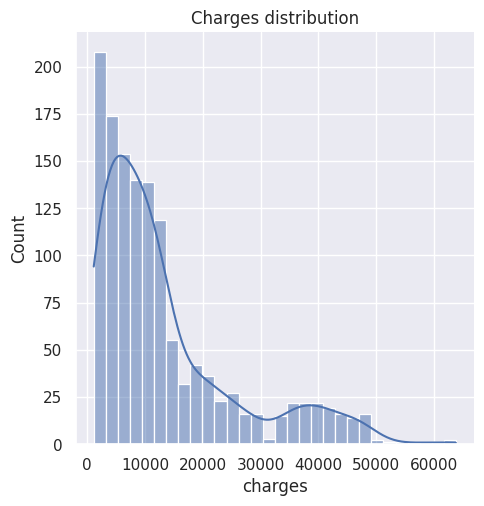

In [12]:
# Distribution of Charges
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['charges'],kde=True)
plt.title('Charges distribution')
plt.show()

Visualisation of Categorical features :
- Sex
- Smoker
- Region

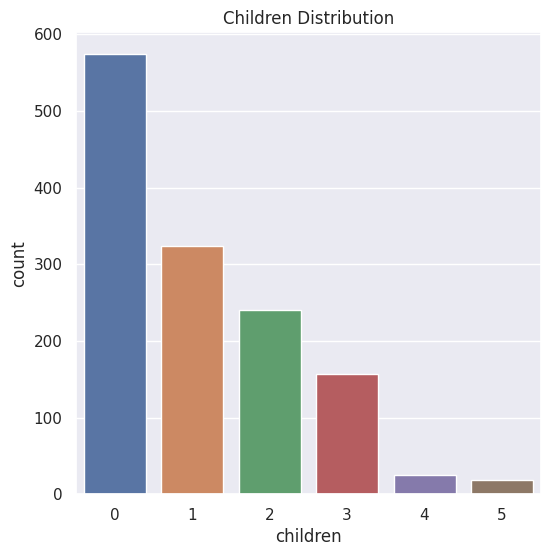

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [13]:
# Children Distribution
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='children')
plt.title('Children Distribution')
plt.show()
df['children'].value_counts()

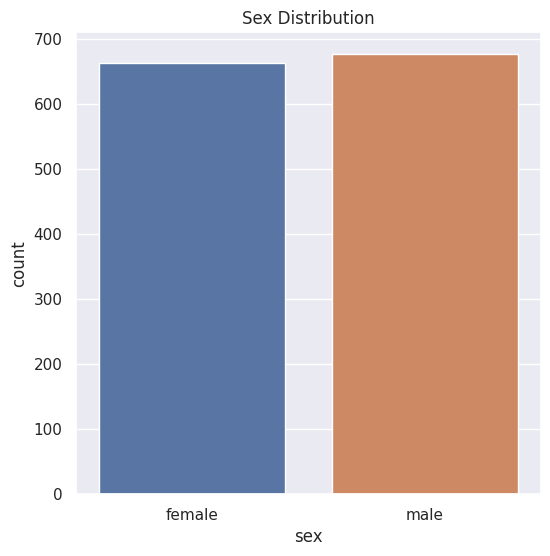

male      676
female    662
Name: sex, dtype: int64

In [14]:
# Sex Distribution
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='sex')
plt.title('Sex Distribution')
plt.show()
df['sex'].value_counts()

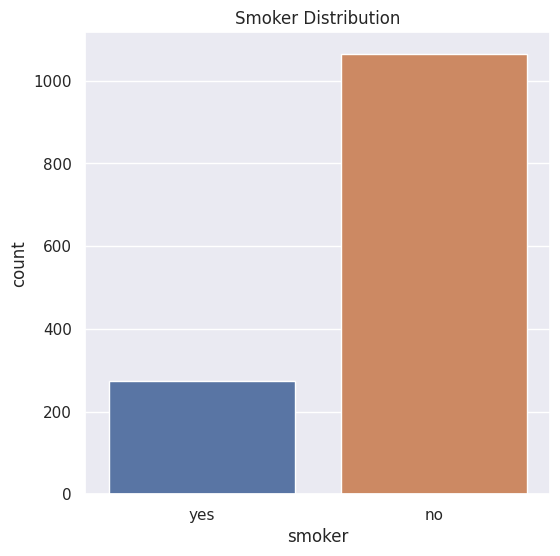

no     1064
yes     274
Name: smoker, dtype: int64

In [15]:
# Smoker Distribution
plt.figure(figsize=(6,6))
sns.countplot(data=df,x='smoker')
plt.title('Smoker Distribution')
plt.show()
df['smoker'].value_counts()

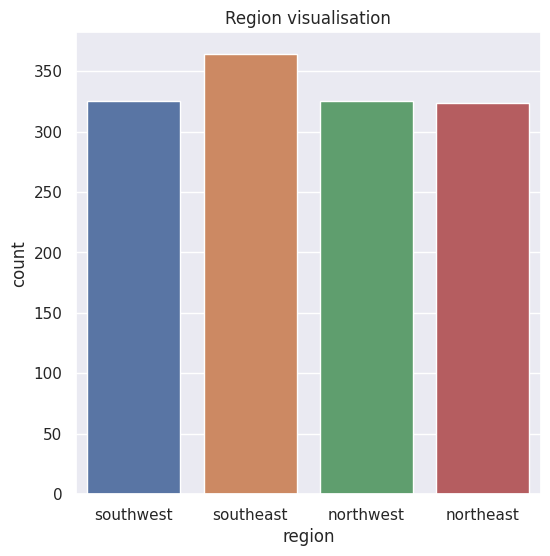

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [16]:
# Region Distribution
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='region')
plt.title('Region visualisation')
plt.show()
df['region'].value_counts()

<ipython-input-17-b735550f1ce1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation= df.corr()


<Axes: >

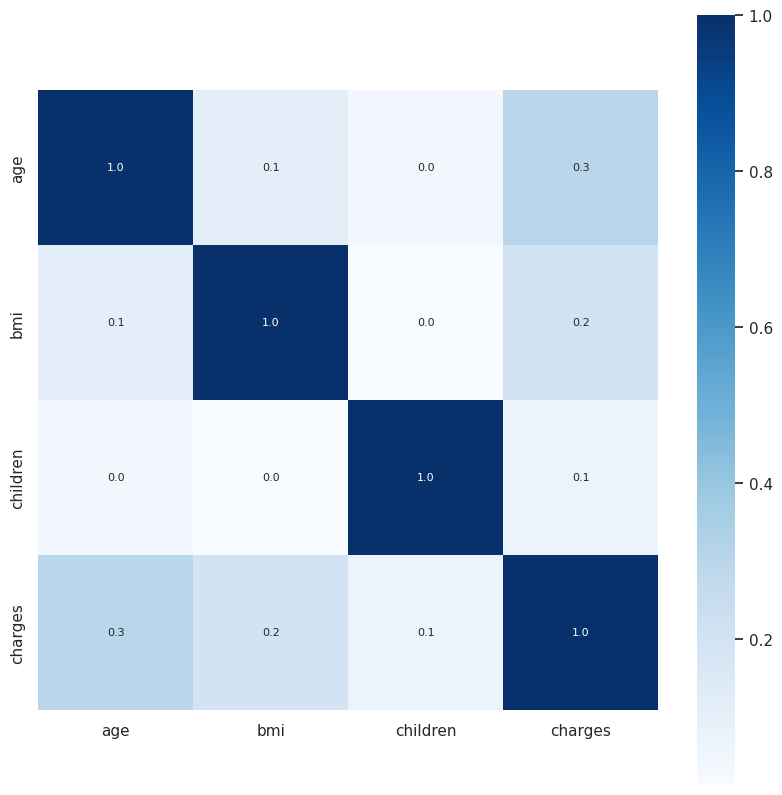

In [17]:
# Constructing a hitmap to understand the correlation between the columns
correlation= df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True, square=True, fmt='.1f',annot=True,annot_kws={'size':8}, cmap='Blues')

Data Pre-Processing

- Encoding the categorical features

In [18]:
# Encoding the sex colum :
df.replace({'sex':{'male':0,'female':1}},inplace=True)

# Encoding the smoker column
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# Encoding the region column
df.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

# Result :
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


Spliting the Features and Target

In [19]:
X = df.drop(columns='charges',axis=1)
y =df['charges']

In [20]:
# Spliting the data into Training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)

In [21]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model training:
Linear Regression Model

In [24]:
# Loading the Linear Regression model

Lr = LinearRegression()
Lr.fit(X_train,y_train)

LinearRegression()

In [29]:
# Model Evaluation

# Predicting the trainning data
train_data_predict = Lr.predict(X_train)

# R Squared Value
r2_train = metrics.r2_score(y_train,train_data_predict)
print('R Squared value',r2_train *100 ,'%')

R Squared value 75.18195459072953 %


In [32]:
# Predicting the test data
test_data_predict = Lr.predict(X_test)
# R Squared Value

r2_train = metrics.r2_score(y_test,test_data_predict)
print('R Squared value',r2_train *100 ,'%')

R Squared value 74.54471618659976 %


In [36]:
# Building the predictive system

input_data = (28,0,33,3,1,1)

# Changing the input data into numpy arra
input_data_arr = np.asarray(input_data)

# Reshape the array
input_data_reshaped = input_data_arr.reshape(1,-1)

# Predicting the result
input_data_predict = Lr.predict(input_data_reshaped)

print('The value is :',input_data_predict)

The value is : [7313.17715978]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
